## Brightness Temperature Plot (comparison between multiple novae)
### Including : V1535 Sco, V1534 Sco, V407 Cyg, RS Oph, V392 Per, V5589 Sgr, V723 Cas

In [1]:
#imports
import numpy as np
import pandas as pd
import astropy.units as u
import astropy.constants as const
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_novas = (

["V392 Per", 3.40, 0.78, 0.33,	"Gaia DR3 Parallax", "2500 +/- 200", "5500 +/- 300"],
["V5589 Sgr", 8.04, 1.78, 1.35,	"Extinctions / Mass Model",	 "4500 +/- 500"],
["V1535 Sco", 7.79, 0.75, 0.69,	"Gaia DR3 Parallax, velocity from https://iopscience.iop.org/article/10.3847/1538-4357/aa7512/pdf", "1659 or 4782"],
["RS Oph", 2.71, 0.2, 0.13,	"Gaia DR3 Parallax, velocity from https://iopscience.iop.org/article/10.3847/1538-4357/acc105/pdf", "3200 +- 500"],			
["V1534 Sco", 9.11, 2.14, 1.55,	"Extinctions/Colors/Mass Model, velocity from https://arxiv.org/pdf/1712.02530", '4200, min 4000'],
['V407 Cyg', 4.8, 1.5, 1.5, "https://iopscience.iop.org/article/10.1088/0004-637X/761/2/173/pdf", "3200, min 2760"],
['V723 Cas', 2.7, 0.4, 0.3, "https://arxiv.org/pdf/0801.3288, velocity from https://www.aanda.org/articles/aa/pdf/2006/20/aa3984-05.pdf", "1750, min 600"],
['U Sco', 6.56, 3.17, 4.02, 'Peter', 'N/A yet']
)

df_novas = pd.DataFrame(data_novas, columns = ['Nova', 'Distance', 'Distance Error (+)', 
                                               'Distance Error (-)', 'Sources', "V1(km/s)",		"V2(km/s)"])

df_novas

,Nova,Distance,Distance Error (+),Distance Error (-),Sources,V1(km/s),V2(km/s)
0,V392 Per,3.40,0.78,0.33,Gaia DR3 Parallax,2500 +/- 200,5500 +/- 300
1,V5589 Sgr,8.04,1.78,1.35,Extinctions / Mass Model,4500 +/- 500,None
2,V1535 Sco,7.79,0.75,0.69,"Gaia DR3 Parallax, velocity from https://iopsc...",1659 or 4782,None
3,RS Oph,2.71,0.20,0.13,"Gaia DR3 Parallax, velocity from https://iopsc...",3200 +- 500,None
4,V1534 Sco,9.11,2.14,1.55,"Extinctions/Colors/Mass Model, velocity from h...","4200, min 4000",None
5,V407 Cyg,4.80,1.50,1.50,https://iopscience.iop.org/article/10.1088/000...,"3200, min 2760",None
6,V723 Cas,2.70,0.40,0.30,"https://arxiv.org/pdf/0801.3288, velocity from...","1750, min 600",None
7,U Sco,6.56,3.17,4.02,Peter,N/A yet,None


### going in order of how it's listed
### V392Per first --> all the items have a 0 at the end of it

In [3]:
#frequency of 1.26 (also has some of 1.4)
f1_26_0 = ([58712.62,	1.26,	0.38,	0.09,	475],
         [58652.58,	1.26,	0.104,	0.0989,	415],
         [58627.98,	1.26,	0.0193,	0.086,	390],
         [58519.04,	1.26,	0.111,	0.109,	282],
         [58493.11,	1.26,	0.178,	0.151,	256],
         [58460.18,	1.26,	0.105,	0.111,	223],
         [58423.58,	1.26,	-0.108,	0.241,	186],
         [58379.44,	1.26,	1.033,	0.223,	142],
         [58368.43,	1.26,	0.971,	0.272,	131],
         [58347.5,	1.4,	0.22,	0.035,	110],
         [58278.58,	1.26,	3.704,	0.0571,	41],
         [58269.61,	1.26,	3.471,	0.0551,	32],
         [58260.96,	1.26,	1.576,	0.0616,	23],
         [58256.62,	1.26,	0.626,	0.0562,	19],
         [58250.64,	1.26,	0.114,	0.0474,	13],
         [58238.93,	1.26,	-0.0122,	0.0531,	1],
        )

df1_26_0 =  pd.DataFrame(f1_26_0, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])

In [4]:
mask_0 = df1_26_0['Flux (mJy)'] > 3 * np.sqrt(df1_26_0["eFlux (mJy)"]**2 + (df1_26_0["Flux (mJy)"]*0.05)**2) #don't show the non-detections
if mask_0.any():
        days1_26_0 = (df1_26_0['Days'][mask_0])
        flux1_26_0 = df1_26_0["Flux (mJy)"][mask_0]
        flux_err1_26_0 = np.sqrt(df1_26_0["eFlux (mJy)"][mask_0]**2 + (df1_26_0["Flux (mJy)"][mask_0]*0.05)**2)

nu1_26_0 = 1.26
date_CAC_sec_n1_26_0 = days1_26_0 * 86400    #time in seconds  (date_CAC is going to be a list of times (from t0))

In [5]:
Vlow0 = 2500 * 100000
Vhigh0 = 5800 * 100000
Distlow0 = 3.07 *  3.086*10**21 
Disthigh0 = 4.18 *  3.086*10**21 

In [6]:
def Con_TBlow(S,T,E,nu): #flux denisty, time, error of flux density, frequency in order those are the plug ins
    R = []
    CTB = []
    CTBE = []

    S = np.array(S)
    T = np.array(T)
    E = np.array(E)
    
    for i in range(len(S)):
        R.append(Vhigh0 * T[i])  #velocity over time                  #R in cm
        angular_diam = 206265 * ((2*R[i])/ Distlow0)                       #unitless
        CTB.append(1765.8 * (nu**(-2)) * S[i]*(angular_diam**(-2)))    #mJy / (Ghz^2)
        CTBE.append(1765.8 * (nu**(-2)) * E[i]*(angular_diam**(-2)))
    
    return(CTB, CTBE)



def Con_TBhigh(S,T,E,nu): #flux denisty, time, error of flux density, frequency in order those are the plug ins
    R = []
    CTB = []
    CTBE = []

    S = np.array(S)
    T = np.array(T)
    E = np.array(E)
    
    for i in range(len(S)):
        R.append(Vlow0 * T[i])  #velocity over time                  #R in cm
        angular_diam = 206265 * ((2*R[i])/ Disthigh0)                       #unitless
        CTB.append(1765.8 * (nu**(-2)) * S[i]*(angular_diam**(-2)))    #mJy / (Ghz^2)
        CTBE.append(1765.8 * (nu**(-2)) * E[i]*(angular_diam**(-2)))
    
    return(CTB, CTBE)

In [7]:
CTB_nuhigh0, CTBError_nuhigh0 = Con_TBhigh(flux1_26_0, date_CAC_sec_n1_26_0, flux_err1_26_0, nu1_26_0)
print(CTB_nuhigh0)

[3925.7499220436694, 119412.5262223999, 131887.2740366668, 42380.25484024416, 5136053.251668377, 7900979.053004699, 6944273.137150027, 4041972.7815778567]


In [8]:
CTB_nulow0, CTBError_nulow0 = Con_TBlow(flux1_26_0, date_CAC_sec_n1_26_0, flux_err1_26_0, nu1_26_0)
print(CTB_nulow0)

[393.4330578942558, 11967.353060049098, 13217.554493275315, 4247.288693176625, 514727.93133488536, 791824.8515340659, 695945.1491957466, 405080.7471082305]


### Now V5589 Sgr, denoted by a 1 at the end of everything

In [9]:
f1_35_1 = ([56526.7,	19,	1.26,	-0.571,	0.276,	1.00E-10,	0.05],
          [56441.4,	18,	1.26,	0.0811,	0.396,	1.00E-10,	0.05],
          [56347.7,	16,	1.26,	0.346,	0.503,	1.00E-10,	0.05],
         [56297.7,	15,	1.26,	0.0504,	0.102,	1.00E-10,	0.05],
         [56270.8,	13,	1.2555,	0,	0.083,	1.00E-10,	0.05],
         [56177.9,	11,	1.33,	0.225,	0.044,	1.00E-10,	0.05],
         [56167.0,	9,	1.36,	0.244,	0.049,	1.00E-10,	0.05],
          [56151.3,	8,	1.25,	0,	0.091,	1.00E-10,	0.05],
         [56148.0,	7,	1.2555,	0.340,	0.071,	1.00E-10,	0.05],
         [56119.1,	5,	1.35,	1.68,	0.120,	1.00E-10,	0.05],
        )

df1_35_1 =  pd.DataFrame(f1_35_1, columns = ["MJD",	"Epoch", "Freq", "Flux", "error","RM", "systematics"])

In [10]:
mask1 = df1_35_1['Flux'] > 3 * np.sqrt(df1_35_1["error"]**2 + (df1_35_1["Flux"]*0.05)**2) #don't show the non-detections
if mask1.any():
        days1_35_1 = (df1_35_1['MJD'][mask1] - 56038)
        flux1_35_1 = df1_35_1["Flux"][mask1]
        flux_err1_35_1 = np.sqrt(df1_35_1["error"][mask1]**2 + (df1_35_1["Flux"][mask1]*0.05)**2)


nu1_35_1 = 1.35
date_CAC_sec_n1_35_1 = days1_35_1 * 86400    #time in seconds  (date_CAC is going to be a list of times (from t0))

In [11]:
Vlow1 = 4000 * 100000
Vhigh1 = 5000 * 100000
Distlow1 = 6.69 *  3.086*10**21 
Disthigh1 = 9.82 *  3.086*10**21 

In [12]:
def Con_TBlow(S,T,E,nu): #flux denisty, time, error of flux density, frequency in order those are the plug ins
    R = []
    CTB = []
    CTBE = []

    S = np.array(S)
    T = np.array(T)
    E = np.array(E)
    
    for i in range(len(S)):
        R.append(Vhigh1 * T[i])  #velocity over time                  #R in cm
        angular_diam = 206265 * ((2*R[i])/ Distlow1)                       #unitless
        CTB.append(1765.8 * (nu**(-2)) * S[i]*(angular_diam**(-2)))    #mJy / (Ghz^2)
        CTBE.append(1765.8 * (nu**(-2)) * E[i]*(angular_diam**(-2)))
    
    return(CTB, CTBE)



def Con_TBhigh(S,T,E,nu): #flux denisty, time, error of flux density, frequency in order those are the plug ins
    R = []
    CTB = []
    CTBE = []

    S = np.array(S)
    T = np.array(T)
    E = np.array(E)
    
    for i in range(len(S)):
        R.append(Vlow1 * T[i])  #velocity over time                  #R in cm
        angular_diam = 206265 * ((2*R[i])/ Disthigh1)                       #unitless
        CTB.append(1765.8 * (nu**(-2)) * S[i]*(angular_diam**(-2)))    #mJy / (Ghz^2)
        CTBE.append(1765.8 * (nu**(-2)) * E[i]*(angular_diam**(-2)))
    
    return(CTB, CTBE)

In [13]:
CTB_nuhigh1, CTBError_nuhigh1 = Con_TBhigh(flux1_35_1, date_CAC_sec_n1_35_1, flux_err1_35_1, nu1_35_1)
print(CTB_nuhigh1)

[50324.25362558629, 64186.05132688815, 123005.29306477895, 1118144.228963218]


In [14]:
CTB_nulow1, CTBError_nulow1 = Con_TBlow(flux1_35_1, date_CAC_sec_n1_35_1, flux_err1_35_1, nu1_35_1)
print(CTB_nulow1)

[14948.120027324276, 19065.574354122225, 36537.0125190226, 332129.20089696447]


## Now V1535 Sco, ending everything with 2

In [15]:
f1_26_2 = ([57187.2, 1.26, 0.277, 0.116], #BnA _> A
         [57158.3, 1.26, -0.152, 0.177], #B_> BnA
         [57143.3, 1.26, -0.0723, 0.106], #B
         [57130.35, 1.26, 0.444, 0.0813],
         [57120.57, 1.26, 0.873, 0.1], #B
         [57106.47, 1.26, 0.273, 0.112], #B
         [57091.4, 1.26, 0.153, 0.0738], #B
         [57082.5, 1.26, 0.0142, 0.101], #B
         [57072.5, 1.26, 1.57, 0.0765], #B
        )

df1_26_2 =  pd.DataFrame(f1_26_2, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

In [16]:
mask2 = df1_26_2['Flux Density (mJy)'] > 3 * np.sqrt(df1_26_2["Uncertainty (mJy)"]**2 + (df1_26_2["Flux Density (mJy)"]*0.05)**2) #don't show the non-detections
if mask2.any():
        days1_26_2 = df1_26_2['MJD'][mask2] - 57064.837
        flux1_26_2 = df1_26_2["Flux Density (mJy)"][mask2]
        flux_err1_26_2 = np.sqrt(df1_26_2["Uncertainty (mJy)"][mask2]**2 + (df1_26_2["Flux Density (mJy)"][mask2]*0.05)**2)

In [17]:
nu1_26_2 = 1.26
date_CAC_sec_n1_26_2 = days1_26_2 * 86400    #time in seconds  (date_CAC is going to be a list of times (from t0))

Vlow2 =  1659* 100000
Vhigh2 =  4782* 100000
Distlow2 = 7.1 *  3.086*10**21 
Disthigh2 = 8.54 *  3.086*10**21 

In [18]:
def Con_TBlow(S,T,E,nu): #flux denisty, time, error of flux density, frequency in order those are the plug ins
    R = []
    CTB = []
    CTBE = []

    S = np.array(S)
    T = np.array(T)
    E = np.array(E)
    
    for i in range(len(S)):
        R.append(Vhigh2 * T[i])  #velocity over time                  #R in cm
        angular_diam = 206265 * ((2*R[i])/ Distlow2)                       #unitless
        CTB.append(1765.8 * (nu**(-2)) * S[i]*(angular_diam**(-2)))    #mJy / (Ghz^2)
        CTBE.append(1765.8 * (nu**(-2)) * E[i]*(angular_diam**(-2)))
    
    return(CTB, CTBE)



def Con_TBhigh(S,T,E,nu): #flux denisty, time, error of flux density, frequency in order those are the plug ins
    R = []
    CTB = []
    CTBE = []

    S = np.array(S)
    T = np.array(T)
    E = np.array(E)
    
    for i in range(len(S)):
        R.append(Vlow2 * T[i])  #velocity over time                  #R in cm
        angular_diam = 206265 * ((2*R[i])/ Disthigh2)                       #unitless
        CTB.append(1765.8 * (nu**(-2)) * S[i]*(angular_diam**(-2)))    #mJy / (Ghz^2)
        CTBE.append(1765.8 * (nu**(-2)) * E[i]*(angular_diam**(-2)))
    
    return(CTB, CTBE)

In [19]:
CTB_nuhigh2, CTBError_nuhigh2 = Con_TBhigh(flux1_26_2, date_CAC_sec_n1_26_2, flux_err1_26_2, nu1_26_2)
print(CTB_nuhigh2)

[2285623.391380324, 6209635.072861461, 590715923.2441869]


In [20]:
CTB_nulow2, CTBError_nulow2 = Con_TBlow(flux1_26_2, date_CAC_sec_n1_26_2, flux_err1_26_2, nu1_26_2)
print(CTB_nulow2)

[190142.52488807615, 516583.65758777875, 49142049.19359383]


## Now RS Oph, dentoed with ending of 3

In [21]:
f2_6_3 = (
    [59439.04,	2.6,	4.71,	0.14],
    [59440.08,	2.6,	18.206,	0.11],
    [59443.99,	2.6,	68.929,	0.37],
    [59446.01,	2.6,	88.695,	0.21],
    [59446.99,	2.6,	84.443,	0.34],
    [59451.01,	2.6,	92.534,	0.24],	
    [59461.01,	2.6,	94.467,	0.22],
    [59463.02,	2.6,	88.638,	0.2],		
    [59466.04,	2.6,	58.862,	0.17],			
    [59467.99,	2.6,	81.96,	0.23],
    [59470.01,	2.6,	74.216,	0.24],
    [59487.96,	2.6,	65.358,	0.18],
    [59510.94,	2.6,	27.414,	0.13],
    [59511.92,	2.6,	36.139,	0.13],
    [59523.82,	2.6,	32.964,	0.13],		
    [59574.76,	2.6,	17.902,	0.2],
    [59588.66,	2.6,	24.59,	0.16],
    [59590.61,	2.6,	24.388,	0.21],
    [59595.61,	2.6,	23.163,	0.16],
    [60034.47,	2.6,	3.295,	0.17],
    [60049.34,	2.6,	2.777,	0.17],
    [60131.12,	2.6,	1.808,	0.017],
)

df2_6_3 =  pd.DataFrame(f2_6_3, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

In [22]:
mask3 = df2_6_3['Flux Density (mJy)'] > 3 * np.sqrt(df2_6_3["Uncertainty (mJy)"]**2 + (df2_6_3["Flux Density (mJy)"]*0.05)**2) #don't show the non-detections
days2_6_3 = df2_6_3['MJD'][mask3] - 59434
flux2_6_3 = df2_6_3["Flux Density (mJy)"][mask3]
flux_err2_6_3 = np.sqrt(df2_6_3["Uncertainty (mJy)"][mask3]**2 + (df2_6_3["Flux Density (mJy)"][mask3]*0.05)**2)

In [23]:
nu2_6_3 = 2.6
date_CAC_sec_n2_6_3 = days2_6_3 * 86400    #time in seconds  (date_CAC is going to be a list of times (from t0))

Vlow3 = 2700 * 100000
Vhigh3 = 3700 * 100000
Distlow3 = 2.58 *  3.086*10**21    
Disthigh3 = 2.91 *  3.086*10**21    

In [24]:
def Con_TBlow(S,T,E,nu): #flux denisty, time, error of flux density, frequency in order those are the plug ins
    R = []
    CTB = []
    CTBE = []

    S = np.array(S)
    T = np.array(T)
    E = np.array(E)
    
    for i in range(len(S)):
        R.append(Vhigh3 * T[i])  #velocity over time                  #R in cm
        angular_diam = 206265 * ((2*R[i])/ Distlow3)                       #unitless
        CTB.append(1765.8 * (nu**(-2)) * S[i]*(angular_diam**(-2)))    #mJy / (Ghz^2)
        CTBE.append(1765.8 * (nu**(-2)) * E[i]*(angular_diam**(-2)))
    
    return(CTB, CTBE)



def Con_TBhigh(S,T,E,nu): #flux denisty, time, error of flux density, frequency in order those are the plug ins
    R = []
    CTB = []
    CTBE = []

    S = np.array(S)
    T = np.array(T)
    E = np.array(E)
    
    for i in range(len(S)):
        R.append(Vlow3 * T[i])  #velocity over time                  #R in cm
        angular_diam = 206265 * ((2*R[i])/ Disthigh3)                       #unitless
        CTB.append(1765.8 * (nu**(-2)) * S[i]*(angular_diam**(-2)))    #mJy / (Ghz^2)
        CTBE.append(1765.8 * (nu**(-2)) * E[i]*(angular_diam**(-2)))
    
    return(CTB, CTBE)

In [25]:
CTB_nuhigh3, CTBError_nuhigh3 = Con_TBhigh(flux2_6_3, date_CAC_sec_n2_6_3, flux_err2_6_3, nu2_6_3)
print(CTB_nuhigh3)

[42176096.80029783, 112024736.47509353, 157100494.6939254, 139868421.7343949, 113828733.30681664, 72744348.69755195, 29453540.445128653, 23940415.474956546, 13042371.023531782, 16136382.193271099, 13018407.21001142, 5105772.068127274, 1053354.598659835, 1353894.4078487197, 929395.0501035245, 205517.86874597374, 233834.75881869806, 226174.5621994498, 201727.40310139046, 2078.6402901510223, 1668.2154401036762, 846.2328730352525]


In [26]:
CTB_nulow3, CTBError_nulow3 = Con_TBlow(flux2_6_3, date_CAC_sec_n2_6_3, flux_err2_6_3, nu2_6_3)
print(CTB_nulow3)

[17654031.594527833, 46891210.59410104, 65758979.7836135, 58545994.620306216, 47646325.91960082, 30449262.2043883, 12328635.72110667, 10020956.969589027, 5459263.601542153, 6754351.935653105, 5449232.850640356, 2137169.3504966563, 440912.19377253024, 566711.8691658321, 389025.3205746991, 86025.47943829227, 97878.33709768372, 94671.93908089167, 84438.869834177, 870.0753303403246, 698.2800761653576, 354.21537340522485]


## Now V1534 Sco, denoted with an ending of 4

In [27]:
f1_26_4 = ([56757.5,	1.26,	14.9,	0.0489],#13B-057	Justin	4/10/2014	A	JMFIT, dowidth -1)
         [56768.4,	1.26,	10.998,	0.056],#13B-057	Justin	4/21/2014	A	JMFIT, dowidth -1
         [56774.4,	1.26,	9.64,	0.0464],#13B-057	Justin	4/27/2014	A	JMFIT, dowidth -1
         [56788.3,	1.26,	7.29,	0.0473],#13B-057	Justin	5/11/2014	A	JMFIT, dowidth -1
         [56821.3,	1.26,	2.75,	0.0824],#13B-057	Justin	6/13/2014	A->D (move)	JMFIT, dowidth -1
         [56841.2,	1.26,	3.53,	0.0426],#13B-057	Justin	7/3/2014	D	JMFIT, dowidth -1
         [56881,	1.26,	1.24,	0.491],#13B-057	Justin	8/12/2014	D	JMFIT, dowidth -1
         [56908.1,	1.26,	1.19,	0.313],#13B-057	Justin	9/8/2014	D	JMFIT had problems this time, used peak flux and off-source rms from difmap
         [56950.9,	1.26,	0.88,	0.176],#13B-057	Justin	10/20/2014	C	JMFIT, dowidth -1
         [56969.9,	1.26,	0.461,	0.178],#13B-057	Justin	11/8/2014	C	NON-DETECTION, very noisy, flux and rms from Difmap
         [56997.8,	1.35,	0.398,	0.156],#13B-057	Justin	12/6/2014	C	NON-DETECTION, flux and rms from difmap, very messy, cut out short baselines to get rid of the worst of it; NOTE: observed in same block as Sgr 2014, calibrated with CASA pipeline
         [57039.7,	1.26,	0.272,	0.136],#13B-057	Justin	1/17/2015	CnB	non-detection, flux and rms from difmap; NOTE: observed in same block as Sgr 2014, calibrated with CASA pipeline
         [57082.6,	1.26,	0.192,	0.116],#13B-057	Justin	3/1/2015	B	non-detection, flux and rms from difmap; NOTE: observed in same block as Sgr 2014, calibrated with CASA pipeline
         [57136.4,	1.26,	0.115,	0.0965],#13B-057	Justin	4/24/2015	B	non-detection, flux and rms from difmap; NOTE: observed in same block as Sgr 2014, calibrated with CASA pipeline
         
        )

df1_26_4 =  pd.DataFrame(f1_26_4, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

In [28]:
mask4 = df1_26_4['Flux Density (mJy)'] > 3 * np.sqrt(df1_26_4["Uncertainty (mJy)"]**2 + (df1_26_4["Flux Density (mJy)"]*0.05)**2) #don't show the non-detections
if mask4.any():
        days1_26_4 = df1_26_4['MJD'][mask4] - 56742.85
        flux1_26_4 = df1_26_4["Flux Density (mJy)"][mask4]
        flux_err1_26_4 = np.sqrt(df1_26_4["Uncertainty (mJy)"][mask4]**2 + (df1_26_4["Flux Density (mJy)"][mask4]*0.05)**2)


In [29]:
nu1_26_4 = 1.26
date_CAC_sec_n1_26_4 = days1_26_4 * 86400    #time in seconds  (date_CAC is going to be a list of times (from t0))

Vlow4 =  4000* 100000
Vhigh4 =  4200* 100000
Distlow4 = 7.56 *  3.086*10**21    
Disthigh4 = 11.25 *  3.086*10**21    

In [30]:
def Con_TBlow(S,T,E,nu): #flux denisty, time, error of flux density, frequency in order those are the plug ins
    R = []
    CTB = []
    CTBE = []

    S = np.array(S)
    T = np.array(T)
    E = np.array(E)
    
    for i in range(len(S)):
        R.append(Vhigh4 * T[i])  #velocity over time                  #R in cm
        angular_diam = 206265 * ((2*R[i])/ Distlow4)                       #unitless
        CTB.append(1765.8 * (nu**(-2)) * S[i]*(angular_diam**(-2)))    #mJy / (Ghz^2)
        CTBE.append(1765.8 * (nu**(-2)) * E[i]*(angular_diam**(-2)))
    
    return(CTB, CTBE)



def Con_TBhigh(S,T,E,nu): #flux denisty, time, error of flux density, frequency in order those are the plug ins
    R = []
    CTB = []
    CTBE = []

    S = np.array(S)
    T = np.array(T)
    E = np.array(E)
    
    for i in range(len(S)):
        R.append(Vlow4 * T[i])  #velocity over time                  #R in cm
        angular_diam = 206265 * ((2*R[i])/ Disthigh4)                       #unitless
        CTB.append(1765.8 * (nu**(-2)) * S[i]*(angular_diam**(-2)))    #mJy / (Ghz^2)
        CTBE.append(1765.8 * (nu**(-2)) * E[i]*(angular_diam**(-2)))
    
    return(CTB, CTBE)

In [31]:
CTB_nuhigh4, CTBError_nuhigh4 = Con_TBhigh(flux1_26_4, date_CAC_sec_n1_26_4, flux_err1_26_4, nu1_26_4)
print(CTB_nuhigh4)

[457878011.882456, 111114484.51234087, 63872964.91961055, 23275473.38620408, 2947036.8571066237, 2406937.128739847, 287410.60870666313, 134086.7922479399]


In [32]:
CTB_nulow4, CTBError_nulow4 = Con_TBlow(flux1_26_4, date_CAC_sec_n1_26_4, flux_err1_26_4, nu1_26_4)
print(CTB_nulow4)

[187546833.66705394, 45512492.85625482, 26162366.431072477, 9533633.898989188, 1207106.2966708723, 985881.4479318409, 117723.38532624919, 54921.95010475616]


## Now V407 Cyg, denoted with an ending of 5

In [33]:
f1_4_5 = (
    [55289.7,    3.0,  1.4,  2.980,  0.500,  0.000,  0.050], #'AS1039',	'D']
    [55298.7,    5.0,  1.4,  4.040,  0.300,  0.000,  0.050], #'AS1039',	'D']
    [55301.7,    6.0,  1.4,  3.597,  0.330,  0.000,  0.050], #'AS1039',	'D']
    [55304.7 ,   7.0 , 1.4,  4.780,  0.300,  0.000,  0.050], #'AS1039',	'D]
    [55308.7  ,  8.0  ,1.4,  5.482,  0.300,  0.000,  0.050], #'AS1039',	'D']
    [55311.7  ,  9.0 , 1.4,  5.780,  0.320,  0.000,  0.050], #'AS1039',	'D']
    [55315.6,   10.0  ,1.4,  5.944, 0.260,  0.000,  0.050], #'AS1039',	'D']
    [55318.6,   11.0  ,1.4,  5.760, 0.280,  0.000,  0.050], #'AS1039',	'D']
    [55323.6,   12.0  ,1.4,  6.441,  0.300,  0.000,  0.050], #'AS1039',	'D']
    [55330.5 ,  13.0  ,1.4,  5.355,  0.280,  0.000,  0.050], #'AS1039',	'D']
    [55332.6 ,  14.0  ,1.4,  5.803,  0.280,  0.000,  0.050], #'AS1039',	'D']	
    [55341.6 ,  15.0  ,1.4,  5.853,  0.300,  0.000,  0.050], #'AS1039',	'D']
    [55345.6 ,  16.0  ,1.4,  5.828,  0.290,  0.000,  0.050], #'AS1039',	'D']
    [55362.5 ,  17.0,	1.4,  5.606,  0.260,  0.000,  0.050], #'AS1039',	'D']
    [55367.6,	  18.0,	1.4,  5.763,  0.330,  0.000,  0.050], #'AS1039',	'D']
    [55368.5,	  19.0,	1.4,  5.905,  0.290,  0.000,  0.050], #'AS1039',	'D']
    [55404.4 ,  20.0,  1.4,  6.917,  0.280,  0.000,  0.050], #'10B-233', 'D']
    [55419.4,	  21.0,	1.4,  7.924,  0.330,  0.000,  0.050],	#'10B-233', 'D']
    [55434.3,	  22.0,	1.4,  5.489,  0.260,  0.000,  0.050], #'10B-233', 'D']
    [55449.2,	  23.0, 	1.4,  5.608,  0.240,  0.000,  0.050], #'10B-233', 'D']
    [55469.2,	  24.0,	1.4,  5.582,  0.145,  0.000,  0.050],#'10B-233', 'DnC']

#and the 1.3 frequency as well
    [55625.4 ,  25.0 , 1.3,  4.220,  0.163,  0.000,  0.050], #'11A-254', 'B']
    [55735.4 ,  26.0,  1.3,  3.596,  0.081,  0.000,  0.050], #'11A-254', 'A']
    [55869.1 ,  27.0,  1.3,  3.642,  0.534,  0.000,  0.050], #'11B-170', 'D']
    [55934.8 ,  28.0,  1.3,  4.688,  1.020,  0.000,  0.050], #'11B-170', 'DnC *held width constant']
    [56035.4 ,  29.0,  1.3,  2.940,  0.301,  0.000,  0.050], #'11B-170', 'C']
# the 1.5 frequency 
    [55284.8,    2.0,  1.5, -0.124,  0.720,  0.000,  0.050]) #'AL733',   'D *non detection']


df_1_4_5 = pd.DataFrame(f1_4_5, columns = ["MJD","Epoch","Freq","Flux","Error1 (gaussfit)","Error2 (image)","Error3 (calibration) (%)",])

In [34]:
mask5 = df_1_4_5['Flux'] > 3 * np.sqrt(df_1_4_5["Error1 (gaussfit)"]**2 + (df_1_4_5["Flux"]*0.05)**2) #don't show the non-detections
if mask5.any():
        days1_4_5 = (df_1_4_5['MJD'][mask5] - 55265.8)
        flux1_4_5 = df_1_4_5["Flux"][mask5]
        flux_err1_4_5 = np.sqrt(df_1_4_5["Error1 (gaussfit)"][mask5]**2 + (df_1_4_5["Flux"][mask5]*0.05)**2)


In [35]:
nu1_4_5 = 1.4
date_CAC_sec_n1_4_5 = days1_4_5 * 86400    #time in seconds  (date_CAC is going to be a list of times (from t0))

Vlow5 =  2760* 100000
Vhigh5 =  3200* 100000
Distlow5 = 3.3 *  3.086*10**21    
Disthigh5 =  6.3*  3.086*10**21    

In [36]:
def Con_TBlow(S,T,E,nu): #flux denisty, time, error of flux density, frequency in order those are the plug ins
    R = []
    CTB = []
    CTBE = []

    S = np.array(S)
    T = np.array(T)
    E = np.array(E)
    
    for i in range(len(S)):
        R.append(Vhigh5 * T[i])  #velocity over time                  #R in cm
        angular_diam = 206265 * ((2*R[i])/ Distlow5)                       #unitless
        CTB.append(1765.8 * (nu**(-2)) * S[i]*(angular_diam**(-2)))    #mJy / (Ghz^2)
        CTBE.append(1765.8 * (nu**(-2)) * E[i]*(angular_diam**(-2)))
    
    return(CTB, CTBE)



def Con_TBhigh(S,T,E,nu): #flux denisty, time, error of flux density, frequency in order those are the plug ins
    R = []
    CTB = []
    CTBE = []

    S = np.array(S)
    T = np.array(T)
    E = np.array(E)
    
    for i in range(len(S)):
        R.append(Vlow5 * T[i])  #velocity over time                  #R in cm
        angular_diam = 206265 * ((2*R[i])/ Disthigh5)                       #unitless
        CTB.append(1765.8 * (nu**(-2)) * S[i]*(angular_diam**(-2)))    #mJy / (Ghz^2)
        CTBE.append(1765.8 * (nu**(-2)) * E[i]*(angular_diam**(-2)))
    
    return(CTB, CTBE)

In [37]:
CTB_nuhigh5, CTBError_nuhigh5 = Con_TBhigh(flux1_4_5, date_CAC_sec_n1_4_5, flux_err1_4_5, nu1_4_5)
print(CTB_nuhigh5)

[18357862.936310224, 13133825.143391931, 9820943.249711664, 11115534.597772589, 10481564.414899671, 9653929.61567958, 8433770.446514715, 7270366.415113422, 6784210.006643995, 4501451.4934026385, 4576161.114718266, 3584608.8581578135, 3220441.5497017712, 2109608.205806168, 1956837.328744962, 1970065.5449618066, 1267047.7322583096, 1181853.637742003, 680291.5572465964, 586693.1304334084, 474776.91678324033, 114835.12451991, 57380.610869629694, 35210.72372072975, 36858.44663176262, 17467.02223819074]


In [38]:
CTB_nulow5, CTBError_nulow5 = Con_TBlow(flux1_4_5, date_CAC_sec_n1_4_5, flux_err1_4_5, nu1_4_5)
print(CTB_nulow5)

[3747029.4919970706, 2680749.405623005, 2004555.9836441139, 2268795.453025593, 2139395.588754188, 1970466.7754146513, 1721419.6827517876, 1483956.9000797041, 1384727.3543216696, 918792.7571467143, 934041.7627295973, 731655.7028119373, 657325.3927132041, 430592.83050206327, 399410.7161212892, 402110.7317202177, 258617.53282564456, 241228.53794077772, 138854.5353564968, 119750.12941936235, 96906.87393615571, 23439.035348835852, 11711.975513884332, 7186.872495663877, 7523.189765473513, 3565.1997016720393]


## NowV723 Cas, denoted with an ending of 6

In [39]:

f5_6 = (	 
[50430, 	5.0,	2.3,	0.5],	

[50473, 	5.0,	2.4,	0.4],	

[50876, 	5.0,	7.0,	0.2],		

[51154, 	5.0,	8.2,	0.5],	

[51601,	5.0,	7.9,	0.4],

[51650,	5.0,	13.5,	0.9],

[51938,	5.0,	6.3,	1.1],
     
[52063,	5.0,	4.0,	0.7],

[52208,	5.0,	5.4,	0.3],
)

df5_6 =  pd.DataFrame(f5_6, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)"])

In [40]:
mask6 = df5_6['Flux (mJy)'] > 3 * np.sqrt(df5_6["eFlux (mJy)"]**2 + (df5_6["Flux (mJy)"]*0.05)**2) #don't show the non-detections

days5_6 = df5_6['MJD'][mask6]-49953
flux5_6 = df5_6["Flux (mJy)"][mask6]
flux_err5_6 = np.sqrt(df5_6["eFlux (mJy)"][mask6]**2 + (df5_6["Flux (mJy)"][mask6]*0.05)**2)

In [41]:
nu5_6 = 5
date_CAC_sec_n5_6 = days5_6 * 86400    #time in seconds  (date_CAC is going to be a list of times (from t0))

Vlow6 = 600 * 100000
Vhigh6 =  1750 * 100000
Distlow6 =  2.4 *  3.086*10**21    
Disthigh6 =  3.1 *  3.086*10**21    

In [42]:
def Con_TBlow(S,T,E,nu): #flux denisty, time, error of flux density, frequency in order those are the plug ins
    R = []
    CTB = []
    CTBE = []

    S = np.array(S)
    T = np.array(T)
    E = np.array(E)
    
    for i in range(len(S)):
        R.append(Vhigh6 * T[i])  #velocity over time                  #R in cm
        angular_diam = 206265 * ((2*R[i])/ Distlow6)                       #unitless
        CTB.append(1765.8 * (nu**(-2)) * S[i]*(angular_diam**(-2)))    #mJy / (Ghz^2)
        CTBE.append(1765.8 * (nu**(-2)) * E[i]*(angular_diam**(-2)))
    
    return(CTB, CTBE)



def Con_TBhigh(S,T,E,nu): #flux denisty, time, error of flux density, frequency in order those are the plug ins
    R = []
    CTB = []
    CTBE = []

    S = np.array(S)
    T = np.array(T)
    E = np.array(E)
    
    for i in range(len(S)):
        R.append(Vlow6 * T[i])  #velocity over time                  #R in cm
        angular_diam = 206265 * ((2*R[i])/ Disthigh6)                       #unitless
        CTB.append(1765.8 * (nu**(-2)) * S[i]*(angular_diam**(-2)))    #mJy / (Ghz^2)
        CTBE.append(1765.8 * (nu**(-2)) * E[i]*(angular_diam**(-2)))
    
    return(CTB, CTBE)

In [43]:
CTB_nuhigh6, CTBError_nuhigh6 = Con_TBhigh(flux5_6, date_CAC_sec_n5_6, flux_err5_6, nu5_6)
print(CTB_nuhigh6)

[14287.845769419862, 12545.2762801788, 11613.692251702912, 8035.326222999835, 4111.386941921048, 6625.91346236919, 2259.931121616383, 1269.903605849055, 1500.9849683847733]


In [44]:
CTB_nulow6, CTBError_nulow6 = Con_TBlow(flux5_6, date_CAC_sec_n5_6, flux_err5_6, nu5_6)
print(CTB_nulow6)

[1006.6818828165913, 883.9052821534971, 818.2684619552309, 566.1467419061763, 289.6768914274667, 466.843437934762, 159.2284626569681, 89.4738768574776, 105.75522709567556]


# Now U Sco, denoted with an ending of 7

In [46]:
f7_7 = (
[59755.22,	7.0,	0.061,	0.019],
    [59769.25,	7.0,	0.115,	0.029],
    [59776.14,	7.0,	0.057,	0.026],
    [59796.03,	7.0,	0.030,	0.020],
    [59815.03,	7.0,	0.020,	0.023],
)

df7_7 = pd.DataFrame(f7_7, columns = ["MJD",	"Frequency(GHz)",	"Fluxdensity(mJy)",	"error(mJy)"])

In [47]:
mask7 = df7_7['Fluxdensity(mJy)'] > 3 * np.sqrt(df7_7["error(mJy)"]**2 + (df7_7["Fluxdensity(mJy)"]*0.05)**2) #don't show the non-detections
days7_7 = df7_7['MJD'][mask7] - 59736.72
flux7_7 = df7_7["Fluxdensity(mJy)"][mask7]
flux_err7_7 = np.sqrt(df7_7["error(mJy)"][mask7]**2 + (df7_7["Fluxdensity(mJy)"][mask7]*0.05)**2)


In [54]:
Vlow7 =  5000* 100000
Vhigh7 =  10000* 100000
Distlow7 = 2.54 *  3.086*10**21    
Disthigh7 =   9.73*  3.086*10**21    


In [55]:
def Con_TBlow(S,T,E,nu): #flux denisty, time, error of flux density, frequency in order those are the plug ins
    R = []
    CTB = []
    CTBE = []

    S = np.array(S)
    T = np.array(T)
    E = np.array(E)
    
    for i in range(len(S)):
        R.append(Vhigh7 * T[i])  #velocity over time                  #R in cm
        angular_diam = 206265 * ((2*R[i])/ Distlow7)                       #unitless
        CTB.append(1765.8 * (nu**(-2)) * S[i]*(angular_diam**(-2)))    #mJy / (Ghz^2)
        CTBE.append(1765.8 * (nu**(-2)) * E[i]*(angular_diam**(-2)))
    
    return(CTB, CTBE)



def Con_TBhigh(S,T,E,nu): #flux denisty, time, error of flux density, frequency in order those are the plug ins
    R = []
    CTB = []
    CTBE = []

    S = np.array(S)
    T = np.array(T)
    E = np.array(E)
    
    for i in range(len(S)):
        R.append(Vlow7 * T[i])  #velocity over time                  #R in cm
        angular_diam = 206265 * ((2*R[i])/ Disthigh7)                       #unitless
        CTB.append(1765.8 * (nu**(-2)) * S[i]*(angular_diam**(-2)))    #mJy / (Ghz^2)
        CTBE.append(1765.8 * (nu**(-2)) * E[i]*(angular_diam**(-2)))
    
    return(CTB, CTBE)
        

In [56]:
nu7_7 = 7
date_CAC_sec_n7_7 = days7_7 * 86400    #time in seconds  (date_CAC is going to be a list of times (from t0))

In [57]:
CTB_nuhigh7, CTBError_nuhigh7 = Con_TBhigh(flux7_7, date_CAC_sec_n7_7, flux_err7_7, nu7_7)
print(CTB_nuhigh7)

[18233.53048300446, 11117.678295922626]


In [58]:
CTB_nulow7, CTBError_nulow7 = Con_TBlow(flux7_7, date_CAC_sec_n7_7, flux_err7_7, nu7_7)
print(CTB_nulow7)

[310.63653184847925, 189.4069297918792]


## Now to plot them all together

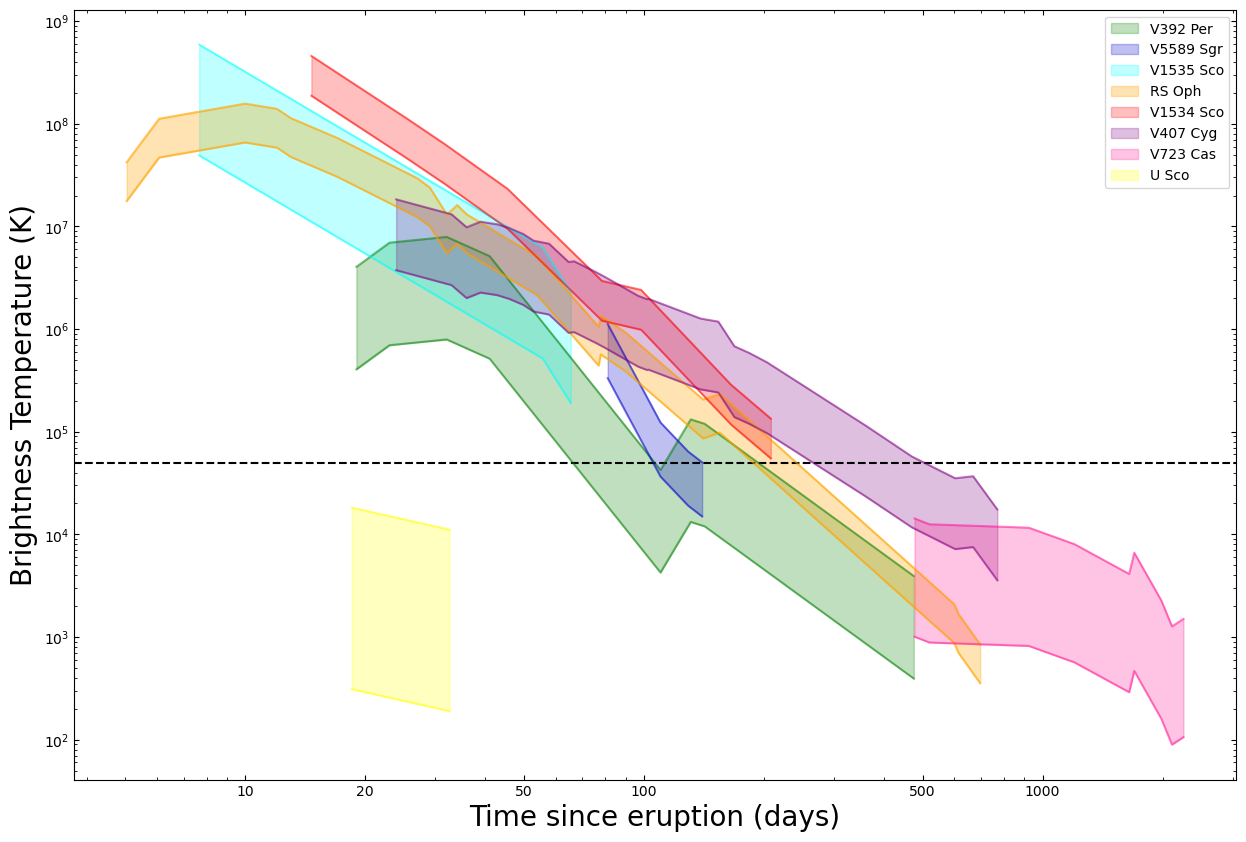

In [59]:
fig, ax = plt.subplots()
fig.set_size_inches(15,10)

ax.axhline(y=5*10**4, color='black', linestyle='--', linewidth=1.5)

#using a function to plot the detections only
# Store which labels have already been used
used_labels = set()

def plot(days, CTBs, CTBerrors, fluxes, errors, color, label_name):
    for day, CTB, CTBerr, flux, err in zip(days, CTBs, CTBerrors, fluxes, errors):
        if flux < 3 * err:
            fmt = 'x'  # square for non-detection
            label = None  # no label for non-detections
            ax.errorbar(day, CTB, fmt=fmt, color=color, label=label)
            
        else:
            fmt = '^'  # triangle for detection
            label = label_name if label_name not in used_labels else None
        
            ax.errorbar(day, CTB, yerr=CTBerr, fmt=fmt, color=color, label=label)
        
        if label:
            used_labels.add(label)

## V392 Per ploting
#plot(days1_26_0, CTB_nuhigh0, CTBError_nuhigh0, flux1_26_0, flux_err1_26_0,'green', 'V392 Per')
ax.plot(days1_26_0[0:27], CTB_nuhigh0[0:27], color='green', linestyle = '-', alpha=.50)

#plot(days1_26_0, CTB_nulow0, CTBError_nulow0, flux1_26_0, flux_err1_26_0,'green', 'V392 Per')
ax.plot(days1_26_0[0:27], CTB_nulow0[0:27], color='green', linestyle = '-', alpha=.50)

ax.fill_between(days1_26_0, CTB_nulow0, CTB_nuhigh0, alpha=.25, color='green', label="V392 Per")

## V5589 Sgr plotting
#plot(days1_35_1, CTB_nuhigh1, CTBError_nuhigh1, flux1_35_1, flux_err1_35_1,'blue', 'V5589 Sgr')
ax.plot(days1_35_1[0:27], CTB_nuhigh1[0:27], color='mediumblue', linestyle = '-', alpha=.50)

#plot(days1_35_1, CTB_nulow1, CTBError_nulow1, flux1_35_1, flux_err1_35_1,'blue', 'V5589 Sgr')
ax.plot(days1_35_1[0:27], CTB_nulow1[0:27], color='mediumblue', linestyle = '-', alpha=.50)

ax.fill_between(days1_35_1, CTB_nulow1, CTB_nuhigh1, alpha=.25, color='mediumblue', label="V5589 Sgr")

## V1535 Sco Plotting

#plot(days1_26_2, CTB_nuhigh2, CTBError_nuhigh2, flux1_26_2, flux_err1_26_2,'gold', 'V1535 Sco')
ax.plot(days1_26_2[0:27], CTB_nuhigh2[0:27], color='aqua', linestyle = '-', alpha=.50)

#plot(days1_26_2, CTB_nulow2, CTBError_nulow2, flux1_26_2, flux_err1_26_2,'gold', 'V1535 Sco')
ax.plot(days1_26_2[0:27], CTB_nulow2[0:27], color='aqua', linestyle = '-', alpha=.50)

ax.fill_between(days1_26_2, CTB_nulow2, CTB_nuhigh2, alpha=.25, color='aqua', label="V1535 Sco")

## RS Oph Plotting

#plot(days2_6_3, CTB_nuhigh3, CTBError_nuhigh3, flux2_6_3, flux_err2_6_3,'orange', 'RS Oph')
ax.plot(days2_6_3[0:27], CTB_nuhigh3[0:27], color='orange', linestyle = '-', alpha=.60)

#plot(days2_6_3, CTB_nulow3, CTBError_nulow3, flux2_6_3, flux_err2_6_3,'orange', 'RS Oph')
ax.plot(days2_6_3[0:27], CTB_nulow3[0:27], color='orange', linestyle = '-', alpha=.60)

ax.fill_between(days2_6_3, CTB_nulow3, CTB_nuhigh3, alpha=.3, color='orange', label = "RS Oph")

## V1534 Sco Plotting

#plot(days1_26_4, CTB_nuhigh4, CTBError_nuhigh4, flux1_26_4, flux_err1_26_4,'red', 'V1534 Sco')
ax.plot(days1_26_4[0:27], CTB_nuhigh4[0:27], color='red', linestyle = '-', alpha=.50)

#plot(days1_26_4, CTB_nulow4, CTBError_nulow4, flux1_26_4, flux_err1_26_4,'red', 'V1534 Sco')
ax.plot(days1_26_4[0:27], CTB_nulow4[0:27], color='red', linestyle = '-', alpha=.50)

ax.fill_between(days1_26_4, CTB_nulow4, CTB_nuhigh4, alpha=.25, color='red', label="V1534 Sco")

## V407 Cyg Plotting

#plot(days1_4_5, CTB_nuhigh5, CTBError_nuhigh5, flux1_4_5, flux_err1_4_5,'purple', 'V407 Cyg')
ax.plot(days1_4_5[0:27], CTB_nuhigh5[0:27], color='purple', linestyle = '-', alpha=.50)

#plot(days1_4_5, CTB_nulow5, CTBError_nulow5, flux1_4_5, flux_err1_4_5,'purple', 'V407 Cyg')
ax.plot(days1_4_5[0:27], CTB_nulow5[0:27], color='purple', linestyle = '-', alpha=.50)

ax.fill_between(days1_4_5, CTB_nulow5, CTB_nuhigh5, alpha=.25, color='purple', label="V407 Cyg")

## V723 Cas plotting

#plot(days5_6, CTB_nuhigh6, CTBError_nuhigh6, flux5_6, flux_err5_6,'pink', 'V723 Cas')
ax.plot(days5_6[0:27], CTB_nuhigh6[0:27], color='deeppink', linestyle = '-', alpha=.50)

#plot(days5_6, CTB_nulow6, CTBError_nulow6, flux5_6, flux_err5_6,'pink', 'V723 Cas')
ax.plot(days5_6[0:27], CTB_nulow6[0:27], color='deeppink', linestyle = '-', alpha=.50)

ax.fill_between(days5_6, CTB_nulow6, CTB_nuhigh6, alpha=.25, color='deeppink', label="V723 Cas")


#plot(days5_6, CTB_nuhigh6, CTBError_nuhigh6, flux5_6, flux_err5_6,'pink', 'V723 Cas')
ax.plot(days7_7[0:27], CTB_nuhigh7[0:27], color='yellow', linestyle = '-', alpha=.50)

#plot(days5_6, CTB_nulow6, CTBError_nulow6, flux5_6, flux_err5_6,'pink', 'V723 Cas')
ax.plot(days7_7[0:27], CTB_nulow7[0:27], color='yellow', linestyle = '-', alpha=.50)

ax.fill_between(days7_7, CTB_nulow7, CTB_nuhigh7, alpha=.25, color='yellow', label="U Sco")


ax.set_xscale('log')
ax.set_xticks([10,20,50,100,500,1000], labels = ['10','20','50','100','500', '1000'])
ax.set_yscale('log')
ax.set_xlabel("Time since eruption (days)", fontsize=20)
ax.set_ylabel("Brightness Temperature (K)", fontsize=20)


ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)

#ax.set_title("Brightness Temperature", fontsize=20)
plt.legend(title='')
plt.show();